In [1]:
import os
import tensorflow as tf
import tensorflow_io as tfio
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Building Data Loading Function
- Decoding audio file into string and amplitude

In [2]:
# this function decodes our audio file
def load_wav_16k_mono(filename):
    # load encoded wav file
    file_contents = tf.io.read_file(filename)
    # decode wav (tensors by channel)
    wav, sample_rate = tf.audio.decode_wav(file_contents, desired_channels=1)
    
    # remove trailing axis
    wav = tf.squeeze(wav, axis=1)
    sample_rate = tf.cast(sample_rate, dtype=tf.int64)
    # goes from 44.1kHz to 16kHz: amplitude of the audio signal
    wav = tfio.audio.resample(wav, rate_in=sample_rate, rate_out=16000)
    
    return wav

### Plot Wave

In [3]:
wave = load_wav_16k_mono('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC216010-4.wav')
nWave = load_wav_16k_mono('/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Not_Capuchinbird_Clips/curlew-sound-3.wav')

2023-01-17 17:59:17.795414: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 17:59:17.901901: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 17:59:17.902803: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-17 17:59:17.911609: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

In [4]:
wave

<tf.Tensor: shape=(56000,), dtype=float32, numpy=
array([-4.2080745e-07,  6.8223898e-07, -4.4688531e-07, ...,
       -1.3327588e-02, -1.9908303e-02,  2.3853235e-02], dtype=float32)>

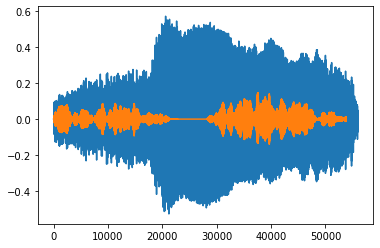

In [5]:
plt.plot(wave)
plt.plot(nWave)
plt.show()

- Blue: Capuchin Bird
- Orange: Another Bird

# Create Tensorflow DataSet

### Define Path to Positive and Negative Data

In [6]:
POS = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Capuchinbird_Clips')
NEG = os.path.join('/kaggle/input','z-by-hp-unlocked-challenge-3-signal-processing','Parsed_Not_Capuchinbird_Clips')

- Reach every .wav file in the path
- Add file in Tensorflow Dataset

In [7]:
pos = tf.data.Dataset.list_files(POS+'/*.wav')
neg = tf.data.Dataset.list_files(NEG+'/*.wav')

In [8]:
pos.as_numpy_iterator().next()

b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC456236-4.wav'

### Add Labels and combine Positive and Negative Samples

In [9]:
positive = tf.data.Dataset.zip((pos, tf.data.Dataset.from_tensor_slices(tf.ones(len(pos)))))
negative = tf.data.Dataset.zip((neg, tf.data.Dataset.from_tensor_slices(tf.zeros(len(neg)))))

In [10]:
tf.ones(len(pos))

<tf.Tensor: shape=(217,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [11]:
data = positive.concatenate(negative)

In [12]:
data.as_numpy_iterator().next()

(b'/kaggle/input/z-by-hp-unlocked-challenge-3-signal-processing/Parsed_Capuchinbird_Clips/XC114132-2.wav',
 1.0)

### Calcualte the Average Length of Capuchin Bird Call

In [13]:
length=[]
for file in os.listdir(os.path.join('../input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips')):
    tensor_wave = load_wav_16k_mono(os.path.join('../input/z-by-hp-unlocked-challenge-3-signal-processing', 'Parsed_Capuchinbird_Clips', file))
    length.append(len(tensor_wave))

In [14]:
len(length)

217

### Claculate Mean, Min, Max of Capuchin Bird Call

In [15]:
tf.math.reduce_mean(length)

<tf.Tensor: shape=(), dtype=int32, numpy=54156>

In [16]:
tf.math.reduce_min(length)

<tf.Tensor: shape=(), dtype=int32, numpy=32000>

In [17]:
tf.math.reduce_max(length)

<tf.Tensor: shape=(), dtype=int32, numpy=80000>

We have 16k HZ frequency which means 16000 cycle per second
- 54156/16000 = 3.38 is average capuchin bird call time
- 32000/16000 = 2 sec is min time in length
- 80000/16000 = 5 sec is max time in length

In [18]:
48000/16000

3.0

# Pre-Processing Function to convert Audio Data into Spectogram

In [19]:
def preprocess(file_path, label):
    wav = load_wav_16k_mono(file_path)

#   As we know average lenght for time taken by Capuchin bird is 3Sec
    wav = wav[:48000]
#   We know minimum length is 32000, so we will add padding of zero to rest of left sapce
    zero_padding = tf.zeros([48000] - tf.shape(wav), dtype=tf.float32)
    wav = tf.concat([zero_padding, wav], 0)
    
    spectrogram = tf.signal.stft(wav, frame_length=320, frame_step=32)
    spectrogram = tf.abs(spectrogram)
    
#   We have to expand our dimension to train it through CNN model
    spectrogram = tf.expand_dims(spectrogram, axis=2)
    
    return spectrogram, label

### Test Function and visualize Spectogram

In [20]:
filePath, label = data.as_numpy_iterator().next()

In [21]:
spectogram, label = preprocess(filePath, label)

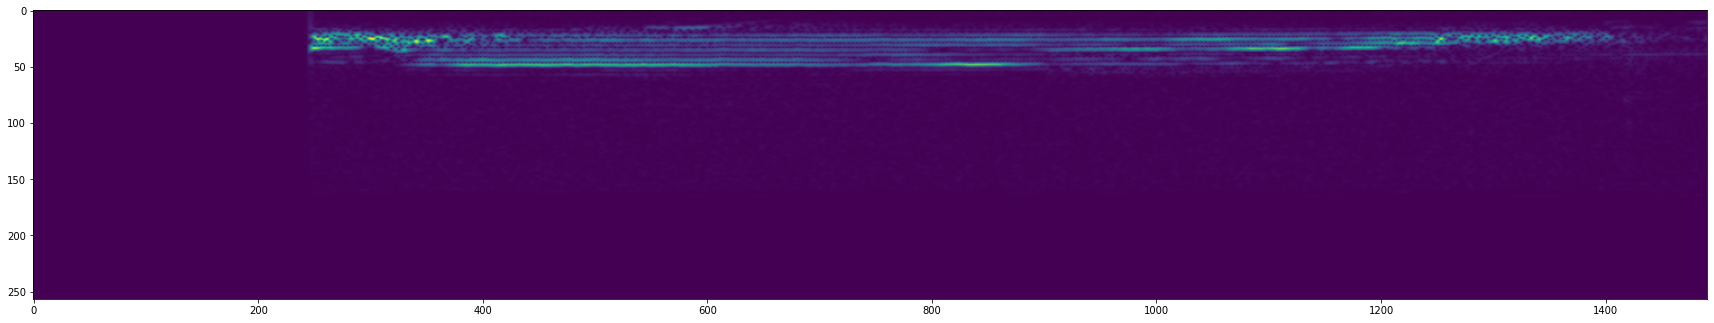

In [22]:
plt.figure(figsize=(30,20))
plt.imshow(tf.transpose(spectogram)[0])
plt.show()

# Train-Test Split

## Create Tesorflow DataPipeline

In [23]:
data = data.map(preprocess)
data = data.cache()
data = data.shuffle(buffer_size=1000)
data = data.batch(16)
data = data.prefetch(8)

In [24]:
train = data.take(36)
test = data.skip(36).take(15)